# Analyze der extract Daten

In [84]:
import pandas as pd

extract = 'extract_1.csv'
names=['ticket', 'customer', 'reply_count', 'complaint', 'state', 'template']

corpus = pd.read_csv(extract, encoding='utf-8', names=names, skiprows=[0], usecols=[1, 2, 3, 4, 5, 6])
corpus.complaint[0]

'Normenauszug 2018, Rechenbuch Metall, Tabellenbuchs Metall, Fechkundebuch Metall, MachineWorld, Topdesign, Automation Control, Konstrukteur 1, Konstrukteur 2 und Konstrukteur 3 funktionieren nicht mehr. Es kommt die Meldung „nicht mehr Seiten kostenlos verfügbar“. Habe alle Bücher bezahlt und bis vor kurzem haben alle funktioniert.'

### Verteilung
Die extract Daten sind nicht ausgewogen verteilt.

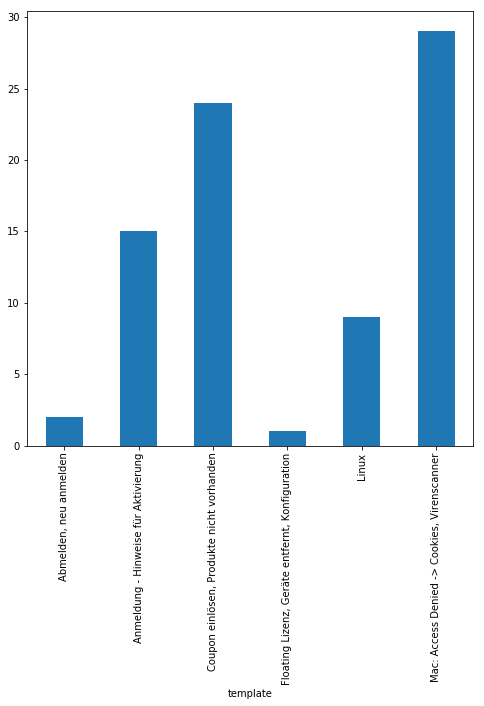

In [80]:
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
corpus.groupby('template').complaint.count().plot.bar(ylim=0)
plt.show()

### Text pre-processing
Ab Zeile 60 gibt es irgendwo ein Problem mit dem Datentyp. Später anschauen.

In [70]:
import re
import nltk
import numpy as np

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('german')

def normalize_document(doc):
    # lower case and remove special characters \ whitespaces
    doc = re.sub(r'[^\u00C0-\u017Fa-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    
    # tokenize document
    tokens = wpt.tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [78]:
norm_corpus = normalize_corpus(list(corpus.complaint.array)[:60])
norm_corpus[:5]

array(['normenauszug rechenbuch metall tabellenbuchs metall fechkundebuch metall machineworld topdesign automation control konstrukteur konstrukteur konstrukteur funktionieren mehr kommt meldung mehr seiten kostenlos verfügbar bücher bezahlt kurzem funktioniert',
       'bilder mehr öffnen editorprogramm bearbeiten',
       'leider fehlen paar kapitel lehrmittel lma d eins davon brauche schule heizungs lüftungsanlagenich app mehrfach gelöscht neu installiert funktioniert trotzdem computer schon heruntergefahren bitte hilfe wünsche schönen tag',
       'fk zb seite lesen steht seiten auszugs genutzt',
       'kapitel technisches englisch herunterladen steht immer unvollständige installation'],
      dtype='<U315')